<a href="https://colab.research.google.com/github/leymilena2531/Proyecto-Final-Distribuidora-Oasis-/blob/master/_Proyeccion_de_Demanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

#**Predicción de Demanda**

---


<br><b>Negocio:</b>  <i>"Optimización de Inventario para Minimizar Costos y Maximizar Rentabilidad"</i> <br>

**Predicción de Demanda - Estudio de una Serie Temporal**<br>
<b>Dataset extraído de:</b> [Kaagle](https://www.kaggle.com/datasets/bhanupratapbiswas/inventory-analysis-case-study)
<br>    
**Introducción**

A partir de los datos de las ventas del 01-01-2016 al 29-02-2016 de una empresa manufacturera dedicada a la distribución de bebidas, se realiza un Modelo Predictivo de Demanda lo cual es fundamental para optimizar la gestión de inventarios.    
Esto permitirá mejorar los procesos de compras, previsiones y la toma de decisiones en general.    
Los datos ya han sido recolectados, limpiados y transformados
Se trata del estudio de una serie temporal: Veremos si se trata de una serie estacionaria o no. En caso de no serlo, haremos las transformaciones necesarias, elegiremos el modelo más apropiado, lo probaremos y ajustaremos.


# Parte 1 - Preprocesamiento de datos

---


# <h3> **1.1 Importación de Liberías** </h3>

---


Para llevar a cabo este proyecto, se realizan las siguientes importaciones y configuraciones iniciales que establecen el entorno para el análisis de series temporales.<br>Estas operaciones preparan las bibliotecas y configuraciones necesarias para el análisis de datos y la visualización de resultados. A lo largo del desarrollo, se importarán librerías adicionales según las necesidades de cada sección, lo que contribuirá a una mayor comprensión y claridad en el código.<br>

In [ ]:
import numpy as np  # Importamos numpy y lo renombramos como np para operaciones numéricas eficientes.
import matplotlib.pyplot as plt  # Librería utilizada para la creación de gráficos y visualización de datos.
import pandas as pd  # Librería para manipulación y análisis de datos.


---


#<h3> **1.2 Importación de datos**</h3>

---




Instalamos PyDrive y configuramos los módulos para acceder a Google Drive y cargar el dataset en Colab.

#### **1.2.1 Lectura del dataset desde la url del csv**

In [ ]:
!pip install -U -q PyDrive

# Configuración de PyDrive y autenticación con Google Drive.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Autenticación y creación del cliente de PyDrive.
auth.authenticate_user()  # Autenticación del usuario.
gauth = GoogleAuth()  # Inicialización de GoogleAuth.
gauth.credentials = GoogleCredentials.get_application_default()  # Obtención de credenciales por defecto de la aplicación.
drive = GoogleDrive(gauth)  # Creación del cliente de Google Drive.

**1.2.1 Acceso a los DataSets**

In [ ]:
#-------------------------------------------------------------------------------

# Conjunto de datos de VENTAS

link = 'https://drive.google.com/file/d/1yBaHNhFdjHfWaZYsUvUgzde4B_ZV2kZp/view'

# Extraer la parte de la ID del archivo del enlace
id = link.split("/")[-2]

# Descargar el archivo desde Google Drive
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('VENTAS.csv')

# Cargar el conjunto de datos desde el archivo CSV descargado
ventas = pd.read_csv('VENTAS.csv', parse_dates=["Fecha_venta"])

#-------------------------------------------------------------------------------


#Concepto del Modelo Predictivo de Demanda
El objetivo del modelo es predecir la demanda futura de productos teniendo en cuenta los datos históricos de lasventas.

Esto permitirá una gestión más eficiente del inventario y una planificación adecuada de reabastecimiento.

---


#<h3> 1.3 Previsualización de datos</h3>

---

### 1.3.1 Visualizamos las primeras filas del conjunto de datos para entender su estructura.<br>
Entrada: VENTAS.csv<br>
Salida: Dataframe "ventas"

In [ ]:
ventas.head()

,VentaID,Fecha_venta,InventarioId,Tienda,ProductoID,Descripcion,Tamaño,Volumen,Clasificacion,ProveedorID,Proveedor,Precio_venta,Cantidad,Precio_total,Impuesto,Año,Mes,Dia
0,0,2016-01-01,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,12546,JIM BEAM BRANDS COMPANY,16.49,1,16.49,0.79,2016,1,1
1,1,2016-01-02,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,12546,JIM BEAM BRANDS COMPANY,16.49,2,32.98,1.57,2016,1,2
2,2,2016-01-03,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,12546,JIM BEAM BRANDS COMPANY,16.49,1,16.49,0.79,2016,1,3
3,3,2016-01-08,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,12546,JIM BEAM BRANDS COMPANY,14.49,1,14.49,0.79,2016,1,8
4,4,2016-01-09,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,375,1,12546,JIM BEAM BRANDS COMPANY,34.99,2,69.98,0.79,2016,1,9


Entrada: ventas.info()<br>Información general del conjunto de datos.<br>
Salida: Resumen de información sobre el conjunto de datos, incluyendo tipos de datos, valores no nulos y uso de memoria<br>

In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   VentaID        1048575 non-null  int64         
 1   Fecha_venta    1048575 non-null  datetime64[ns]
 2   InventarioId   1048575 non-null  object        
 3   Tienda         1048575 non-null  int64         
 4   ProductoID     1048575 non-null  int64         
 5   Descripcion    1048575 non-null  object        
 6   Tamaño         1048575 non-null  object        
 7   Volumen        1048575 non-null  int64         
 8   Clasificacion  1048575 non-null  int64         
 9   ProveedorID    1048575 non-null  int64         
 10  Proveedor      1048575 non-null  object        
 11  Precio_venta   1048575 non-null  float64       
 12  Cantidad       1048575 non-null  int64         
 13  Precio_total   1048575 non-null  float64       
 14  Impuesto       1048575 non-null  f

Entrada: ventas.describe()<br>
Estadísticas descriptivas del conjunto de datos<br>
Salida: Resumen de estadísticas descriptivas, como recuento, media, desviación estándar, mínimo, percentiles y máximo<br>

In [ ]:
ventas.describe()

,VentaID,Fecha_venta,Tienda,ProductoID,Volumen,Clasificacion,ProveedorID,Precio_venta,Cantidad,Precio_total,Impuesto,Año,Mes,Dia
count,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06
mean,5.242870e+05,2016-01-19 21:59:18.574636288,4.008063e+01,1.216959e+04,9.500280e+02,1.416550e+00,6.995043e+03,1.543162e+01,2.337619e+00,3.160420e+01,1.326847e+00,2016.0,1.105838e+00,1.663521e+01
min,0.000000e+00,2016-01-01 00:00:00,1.000000e+00,5.800000e+01,5.000000e+01,1.000000e+00,2.000000e+00,4.900000e-01,1.000000e+00,4.900000e-01,1.000000e-02,2016.0,1.000000e+00,1.000000e+00
25%,2.621435e+05,2016-01-10 00:00:00,1.500000e+01,3.680000e+03,7.500000e+02,1.000000e+00,3.252000e+03,8.990000e+00,1.000000e+00,1.099000e+01,1.600000e-01,2016.0,1.000000e+00,9.000000e+00
50%,5.242870e+05,2016-01-19 00:00:00,3.900000e+01,6.296000e+03,7.500000e+02,1.000000e+00,4.425000e+03,1.299000e+01,1.000000e+00,1.799000e+01,6.800000e-01,2016.0,1.000000e+00,1.600000e+01
75%,7.864305e+05,2016-01-28 00:00:00,6.400000e+01,1.795400e+04,1.500000e+03,2.000000e+00,9.552000e+03,1.899000e+01,2.000000e+00,3.199000e+01,1.570000e+00,2016.0,1.000000e+00,2.400000e+01
max,1.048574e+06,2016-02-29 00:00:00,7.900000e+01,9.008900e+04,2.000000e+04,2.000000e+00,1.733570e+05,4.999990e+03,4.320000e+02,1.327997e+04,3.785200e+02,2016.0,2.000000e+00,3.100000e+01
std,3.026977e+05,NaN,2.435739e+01,1.241921e+04,7.142708e+02,4.929872e-01,8.426736e+03,1.404967e+01,3.511492e+00,6.570249e+01,3.407898e+00,0.0,3.076302e-01,8.941159e+00


---


#<h3> 1.4 Análisis exploratorio de datos</h3>

---

**Previsión de la demanda**

Agrupación y Suma por Fecha

In [ ]:
# Agrupar las ventas por fecha y sumar la cantidad vendida
cantidad_total_de_ventas = ventas.groupby("Fecha_venta").agg({"Cantidad": "sum"})

In [ ]:
# Calcular la media de ventas por día
media_diaria = cantidad_total_de_ventas['Cantidad'].mean()

# Calcular la media de ventas por semana
cantidad_total_de_ventas_semanal = cantidad_total_de_ventas.resample('W').sum()
media_semanal = cantidad_total_de_ventas_semanal['Cantidad'].mean()

# Calcular la media de ventas por mes
cantidad_total_de_ventas_mensual = cantidad_total_de_ventas.resample('M').sum()
media_mensual = cantidad_total_de_ventas_mensual['Cantidad'].mean()

# Redondear los resultados a números enteros
media_diaria_entera = round(media_diaria)
media_semanal_entera = round(media_semanal)
media_mensual_entera = round(media_mensual)


print(f"Media diaria de ventas: {media_diaria_entera}")
print(f"Media semanal de ventas: {media_semanal_entera}")
print(f"Media mensual de ventas: {media_mensual_entera}")

Media diaria de ventas: 40853
Media semanal de ventas: 245117
Media mensual de ventas: 1225584


In [ ]:
import seaborn as sns
# calcular outliers
# Calcular el rango intercuartílico (IQR)
Q1 = cantidad_total_de_ventas['Cantidad'].quantile(0.25)
Q3 = cantidad_total_de_ventas['Cantidad'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = cantidad_total_de_ventas[(cantidad_total_de_ventas['Cantidad'] < limite_inferior) | (cantidad_total_de_ventas['Cantidad'] > limite_superior)]

print("Outliers detectados:")
print(outliers)


Outliers detectados:
             Cantidad
Fecha_venta          
2016-01-29     180426


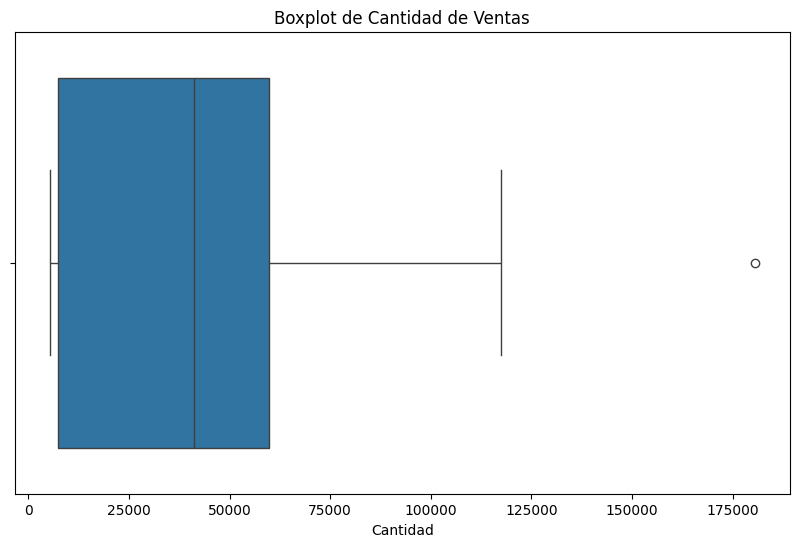

In [ ]:
# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=cantidad_total_de_ventas['Cantidad'])
plt.title('Boxplot de Cantidad de Ventas')
plt.show()


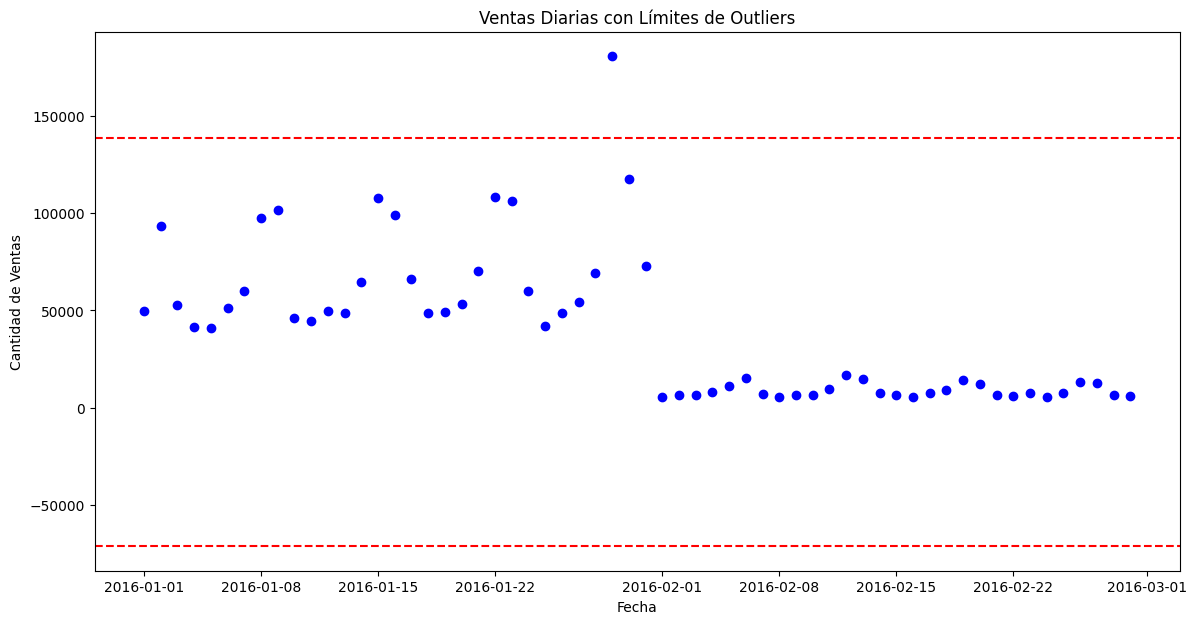

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(cantidad_total_de_ventas.index, cantidad_total_de_ventas['Cantidad'], color='blue')
plt.axhline(y=limite_superior, color='r', linestyle='--')
plt.axhline(y=limite_inferior, color='r', linestyle='--')
plt.title('Ventas Diarias con Límites de Outliers')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.show()

**Previsión de la demanda:**

Podemos definir la cantidad de ventas como demanda. En el gráfico se observa un factor de estacionalidad que afecta de forma semanal y el mensual.

Podemos ver que el primer pico de demanda se produce el 2 de enero, que es jueves/viernes, y que cada jueves/viernes se alcanza el pico y baja el domingo.
El pico de demanda se produce el 29 de enero (que de nuevo es jueves/viernes) con 180.000 ventas, pero al acercarse febrero baja instantáneamente y sólo alcanza un máximo de 16.700, lo que supone sólo un 9%. Esto indica que hay estacionalidad mensual.

Por lo que nos centramos en realizar el analisis predictivo en fechas del 01/01/2016 al 31/01/2016

**1.- Importación de Librerías y Configuración Inicial**

In [ ]:
import plotly.express as px
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

**2. Filtrado de Datos**

En primer lugar, se filtran los datos de ventas para incluir solo aquellas transacciones con una cantidad vendida mayor a cero. Esto elimina registros no relevantes o errores en los datos.

Luego, se seleccionan las ventas correspondientes al mes de enero de 2016.

In [ ]:
# Filtrar ventas para incluir solo aquellas con cantidad mayor a cero
ventas = ventas[ventas['Cantidad'] > 0]
# Filtrar ventas de enero de 2016
ventas_enero = ventas[(ventas['Fecha_venta'] >= '2016-01-01') & (ventas['Fecha_venta'] < '2016-01-31')]

**3. Creación del DataFrame**

Se agrupan las ventas por fecha ("Fecha_venta") y se calcula la suma total de la cantidad vendida para cada fecha. Esto crea un nuevo DataFrame llamado *cantidad_enero*.

In [ ]:
# Crear un DataFrame con las fechas y la cantidad vendida
cantidad_enero = ventas_enero.groupby("Fecha_venta").agg({"Cantidad": "sum"})

**4. Configuración del Proceso Determinístico**

Se configura un proceso determinístico para modelar las tendencias y estacionalidades en los datos de ventas. Utilizamos la clase *CalendarFourier* para crear componentes estacionales (en este caso, frecuencia mensual).

In [ ]:
# Configurar el proceso determinístico
fourierM = CalendarFourier(freq="M", order=6)
dp = DeterministicProcess(
    index=cantidad_enero.index,
    constant=True,
    order=4,
    seasonal=True,
    additional_terms=[fourierM],
)

**5. Normalización de Características**

Se utiliza *StandardScaler* para normalizar las características del proceso determinístico. Esto es importante para que las características tengan una escala comparable y no afecten negativamente el rendimiento del modelo.

In [ ]:
# Obtener las variables exógenas
X = dp.in_sample()

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**6. Ajuste del Modelo de Regresión Lineal**

Se crea un modelo de *Regresión Lineal* y se ajusta a las características normalizadas (*X_scaled*) y la cantidad vendida (*cantidad_enero['Cantidad']*).
El objetivo es predecir la cantidad vendida.

In [ ]:
# Ajustar el modelo de regresión lineal
model = LinearRegression().fit(X_scaled, cantidad_enero['Cantidad'])

**7. Predicciones y Gráfico Interactivo**

- Se realizan predicciones en el conjunto de entrenamiento utilizando el modelo de regresión lineal.<br>
- Las predicciones se agregan al DataFrame cantidad_enero como la columna "prediccion".<br>
- Se crea un gráfico interactivo utilizando Plot

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred = pd.Series(
    model.predict(X_scaled),
    index=X.index,
    name="fitted"
)
# Añadir predicciones al DataFrame
cantidad_enero["prediccion"] = y_pred
# Gráfico interactivo
fig = px.line(cantidad_enero, x=cantidad_enero.index, y=["Cantidad", "prediccion"], title="Ventas en enero 2016 vs Predicción")
fig.show()

**8.- Función para Predecir Ventas Futuras**


Se Realiza predicciones de ventas futuras para un período específico.

  *Parámetros:*<br>


*   fecha_inicio: Fecha a partir de la cual se realizarán las predicciones (formato 'YYYY-MM-DD').<br>
*   meses_futuros: Número de meses para predecir hacia el futuro.

*Retorna:*<br>


*   predicciones_futuras: Serie temporal con las predicciones de ventas.


In [ ]:
def predecir_ventas(fecha_inicio, meses_futuros):

    # Generar un rango de fechas futuras con frecuencia diaria
    fechas_futuras = pd.date_range(start=fecha_inicio, periods=meses_futuros * 31, freq='D')

    # Configurar el proceso determinístico para las fechas futuras usando las mismas configuraciones
    dp_futuro = DeterministicProcess(
        index=fechas_futuras,
        constant=True,
        order=4,
        seasonal=True,
        additional_terms=[fourierM],
    )

    # Obtener las variables exógenas para las fechas futuras
    X_futuro = dp_futuro.in_sample()

    # Asegurar que las columnas de X_futuro sean consistentes con las de X original
    X_futuro = X_futuro.reindex(columns=X.columns, fill_value=0)

    # Normalizar las características futuras
    X_futuro_scaled = scaler.transform(X_futuro)

    # Realizar predicciones para las fechas futuras
    predicciones_futuras = pd.Series(
        model.predict(X_futuro_scaled),
        index=fechas_futuras,
        name="prediccion"
    )

    return predicciones_futuras

**8. Predicciones para los Próximos Dos Meses**

In [ ]:
# Predecir ventas para los próximos dos meses a partir del final de enero
predicciones = predecir_ventas('2016-02-01', 2)

**9. Obtener la Predicción para una Fecha Específica**

In [ ]:
# Obtener la predicción para una fecha específica (por ejemplo, '2016-01-20')
fecha_especifica = pd.to_datetime('2016-01-20')
prediccion_especifica = cantidad_enero.loc[fecha_especifica, "prediccion"]
prediccion_especifica_redondeada = round(prediccion_especifica)
print(f"Predicción venta: {fecha_especifica.strftime('%Y-%m-%d')}: {prediccion_especifica_redondeada}")

Predicción venta: 2016-01-20: 53862


**10. Filtrado de Ventas para Enero de 2016**

In [ ]:
# Filtrar ventas_filtro para enero de 2016
ventas_enero = ventas[(ventas['Fecha_venta'] >= '2016-01-01') & (ventas['Fecha_venta'] < '2016-02-01')]

**11. Creación del DataFrame**

In [ ]:
# Crear un DataFrame con las fechas y la cantidad vendida
cantidad_enero = ventas_enero.groupby("Fecha_venta").agg({"Cantidad": "sum"}).reset_index()

**10. Función para Obtener la Cantidad Vendida en una Fecha Específica**

In [ ]:
def obtener_ventas_fecha(fecha):
    try:
        # Convertir la fecha a datetime
        fecha_dt = pd.to_datetime(fecha)

        # Filtrar el DataFrame para la fecha especificada
        ventas_en_fecha = cantidad_enero[cantidad_enero['Fecha_venta'] == fecha_dt]

        # Verificar si hay ventas en la fecha especificada
        if not ventas_en_fecha.empty:
            # Sumar la cantidad vendida en esa fecha
            cantidad_vendida = ventas_en_fecha['Cantidad'].sum()
            return cantidad_vendida
        else:
            return "No hay ventas registradas para esta fecha."
    except Exception as e:
        return str(e)

# Entrada de fecha
fecha_consulta = '2016-01-20'
cantidad_vendida = obtener_ventas_fecha(fecha_consulta)
print(f"Cantidad vendida: {fecha_consulta}: {cantidad_vendida}")

Cantidad vendida: 2016-01-20: 53132
